In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas seaborn matplotlib scikit-learn

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [6]:
data=pd.read_csv("cardekho.csv")
data.shape

(8338, 18)

In [7]:
data.drop(columns=['RDO_no'],inplace=True)

In [8]:
d=data[data.duplicated()]

In [9]:
data.drop(d.index,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8223 entries, 0 to 8337
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel_type          8223 non-null   object 
 1   body_type          8219 non-null   object 
 2   kilometer          8223 non-null   int64  
 3   transmission_type  8223 non-null   object 
 4   owner_no           8223 non-null   int64  
 5   brand              8223 non-null   object 
 6   model              8223 non-null   object 
 7   model_year         8223 non-null   int64  
 8   price              8223 non-null   float64
 9   registration_year  8223 non-null   int64  
 10  seats_count        8223 non-null   int64  
 11  car_engine_cc      8223 non-null   int64  
 12  mileage            8223 non-null   float64
 13  color              8223 non-null   object 
 14  gear_box           8223 non-null   int64  
 15  location           8223 non-null   object 
 16  age                8223 non-n

In [11]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Checking for outliers

Outliers detected in kilometer:
 count    4.900000e+01
mean     3.782715e+05
std      8.136991e+05
min      1.549310e+05
25%      1.620490e+05
50%      1.765500e+05
75%      2.087080e+05
max      5.500000e+06
Name: kilometer, dtype: float64 

Outliers detected in owner_no:
 count    95.000000
mean      4.178947
std       0.385342
min       4.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: owner_no, dtype: float64 

Outliers detected in model_year:
 count     126.000000
mean     2003.793651
std         3.180736
min      1985.000000
25%      2003.000000
50%      2005.000000
75%      2006.000000
max      2006.000000
Name: model_year, dtype: float64 

Outliers detected in price:
 count    9.030000e+02
mean     3.903584e+06
std      1.979958e+06
min      1.840000e+06
25%      2.299500e+06
50%      3.250000e+06
75%      5.000000e+06
max      9.900000e+06
Name: price, dtype: float64 

Outliers detected in registration_year:
 count     155.000000
mean  

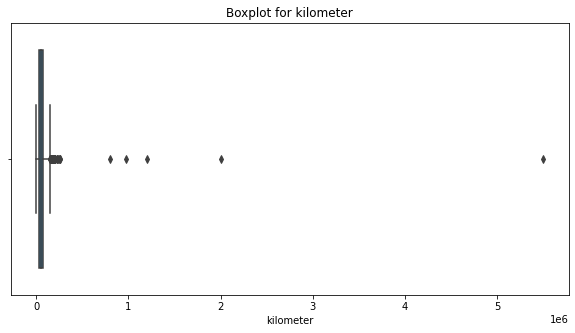

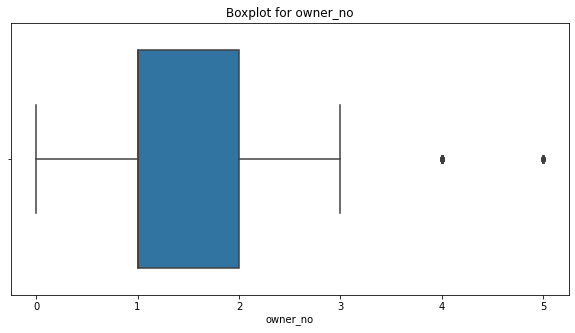

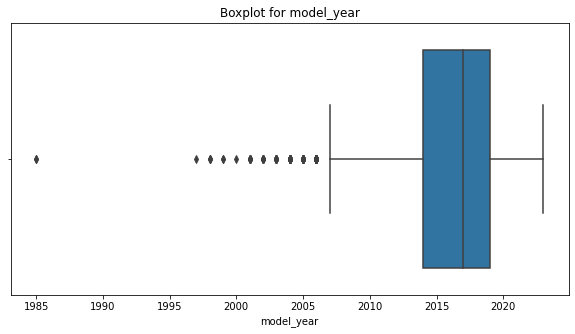

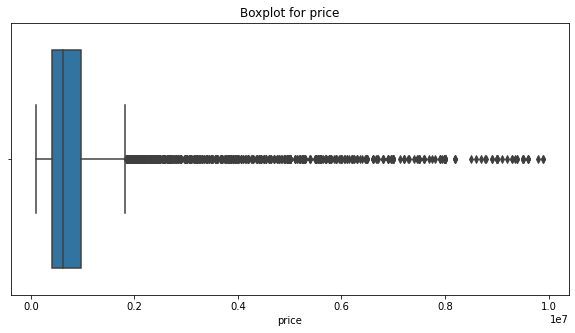

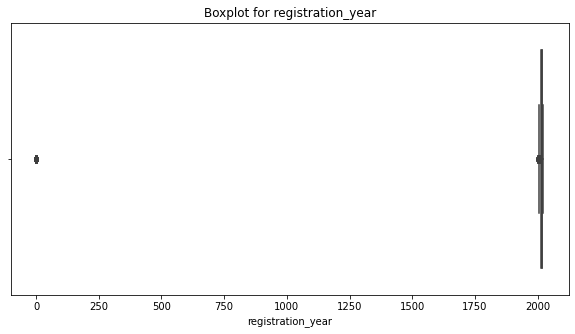

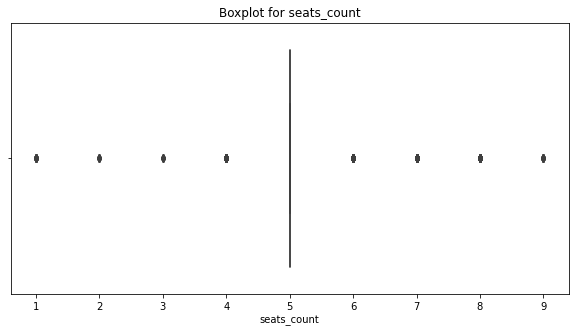

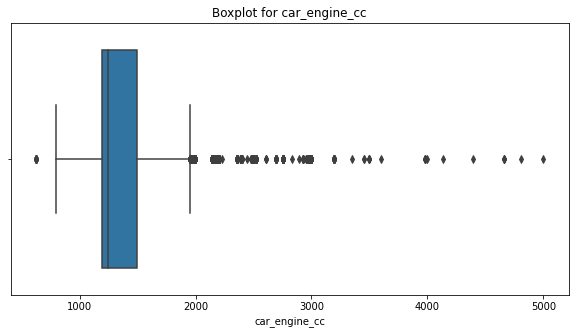

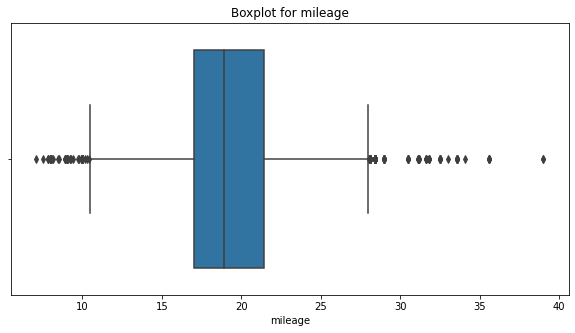

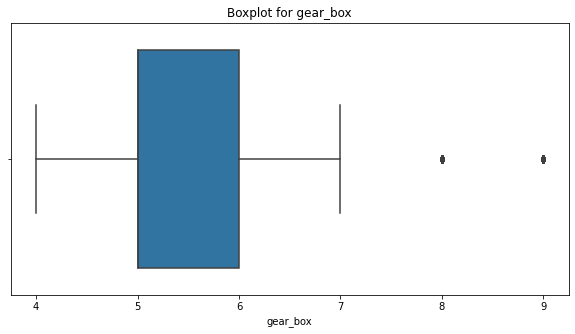

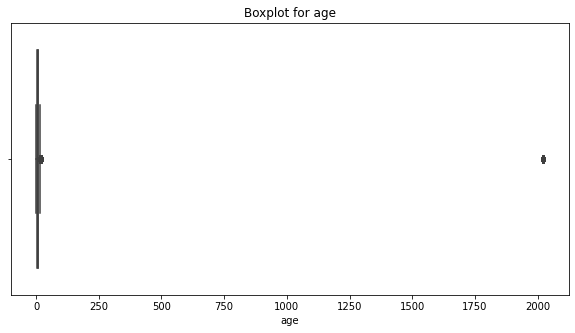

In [12]:
def detect_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(data, numerical_cols)

# Print outliers for each column
for col, outliers_col in outliers.items():
    if not outliers_col.empty:
        print(f"Outliers detected in {col}:\n", outliers_col.describe(), "\n")

# Step 4: Visualize outliers using boxplots
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()

# Plot the boxplots to visualize outliers
plot_boxplots(data, numerical_cols)


In [13]:
def clean_outliers_iqr(df, numerical_cols, method='remove'):
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            # Remove rows where outliers are present
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            # Cap outliers to the nearest boundary value
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Step 3: Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(data, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Step 4: Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(data, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])

# Optional: Save the cleaned data to new Excel files
cleaned_data_remove.to_excel('Cleaned_Cars_Data_Removed_Outliers.xlsx', index=False)
cleaned_data_cap.to_excel('Cleaned_Cars_Data_Capped_Outliers.xlsx', index=False)

Data cleaned by removing outliers. Remaining rows: 5981
Data cleaned by capping outliers. Remaining rows: 8223


# Rechecking for outliers

In [14]:
def detect_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(data, numerical_cols)

# Print outliers for each column
for col, outliers_col in outliers.items():
    if not outliers_col.empty:
        print(f"Outliers detected in {col}:\n", outliers_col.describe(), "\n")

# # Step 4: Visualize outliers using boxplots
# def plot_boxplots(df, numerical_cols):
#     for col in numerical_cols:
#         plt.figure(figsize=(10, 5))
#         sns.boxplot(data=df, x=col)
#         plt.title(f'Boxplot for {col}')
#         plt.show()

Outliers detected in kilometer:
 count    4.900000e+01
mean     3.782715e+05
std      8.136991e+05
min      1.549310e+05
25%      1.620490e+05
50%      1.765500e+05
75%      2.087080e+05
max      5.500000e+06
Name: kilometer, dtype: float64 

Outliers detected in owner_no:
 count    95.000000
mean      4.178947
std       0.385342
min       4.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: owner_no, dtype: float64 

Outliers detected in model_year:
 count     126.000000
mean     2003.793651
std         3.180736
min      1985.000000
25%      2003.000000
50%      2005.000000
75%      2006.000000
max      2006.000000
Name: model_year, dtype: float64 

Outliers detected in price:
 count    9.030000e+02
mean     3.903584e+06
std      1.979958e+06
min      1.840000e+06
25%      2.299500e+06
50%      3.250000e+06
75%      5.000000e+06
max      9.900000e+06
Name: price, dtype: float64 

Outliers detected in registration_year:
 count     155.000000
mean  

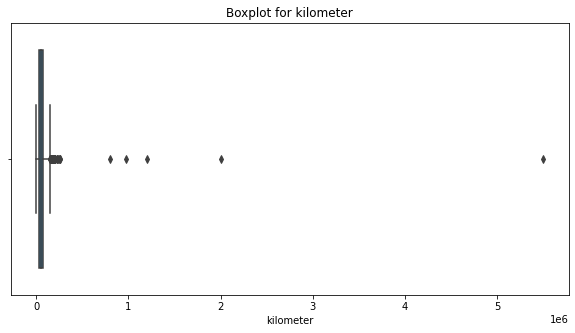

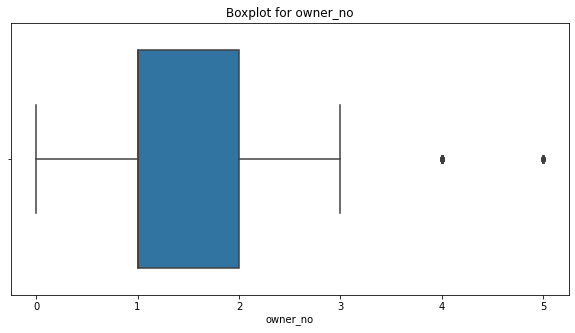

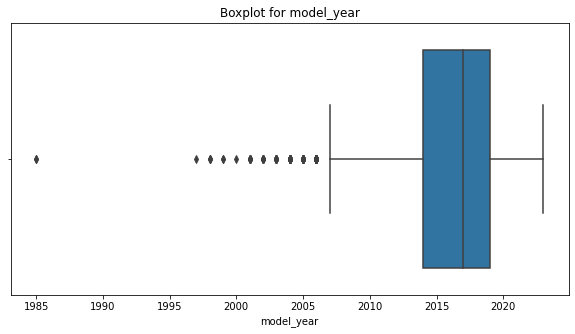

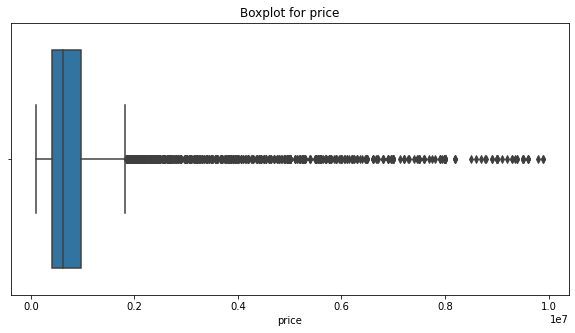

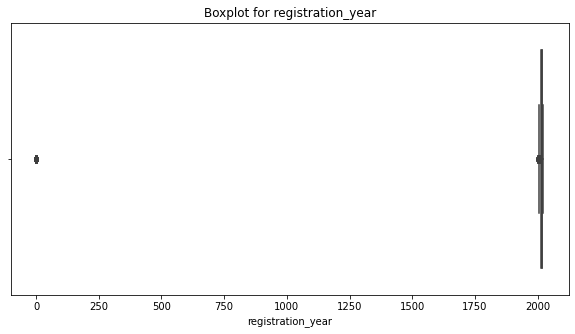

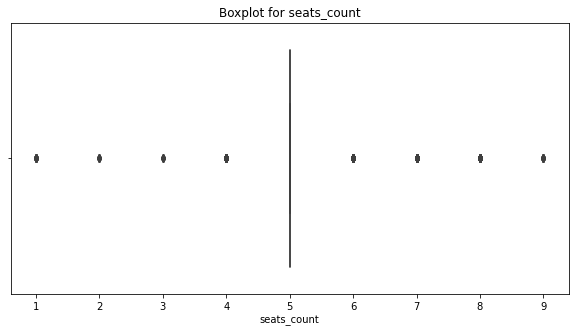

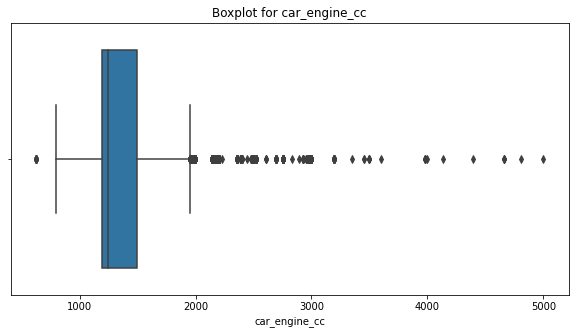

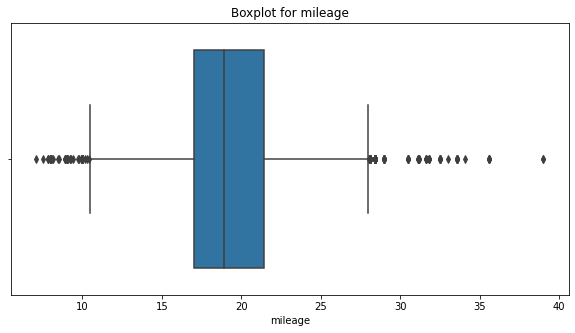

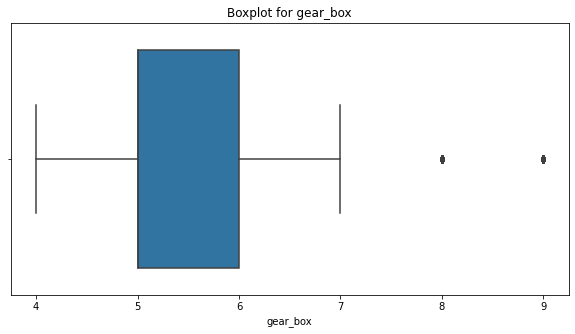

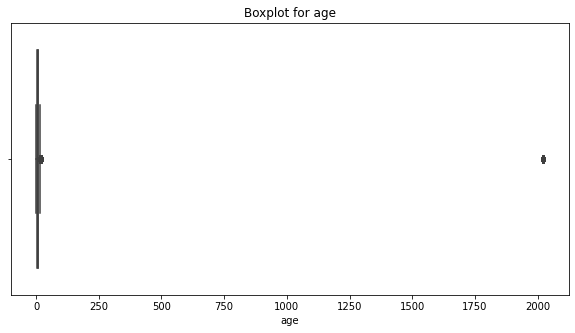

In [15]:
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()
plot_boxplots(data, numerical_cols)

# Descriptive Analysis, Data Visualizations and Feature Selection

In [ ]:
def plot_numerical_distributions(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols].hist(bins=30, figsize=(20, 20), layout=(7, 4))  # Adjust layout as needed
    plt.tight_layout()
    plt.show()

# Step 2: Examine correlations between numerical variables and the target variable (Price)
def plot_correlation_heatmap(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()

    # Identify features most correlated with 'Price'
    price_correlation = correlation_matrix['price'].sort_values(ascending=False)
    print("Top features most correlated with Price:\n", price_correlation.head(10))

# Step 3: Analyze categorical variables for patterns
def analyze_categorical_variables(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=col, y='price', data=df)
        plt.xticks(rotation=90)
        plt.title(f'Price Distribution by {col}')
        plt.show()


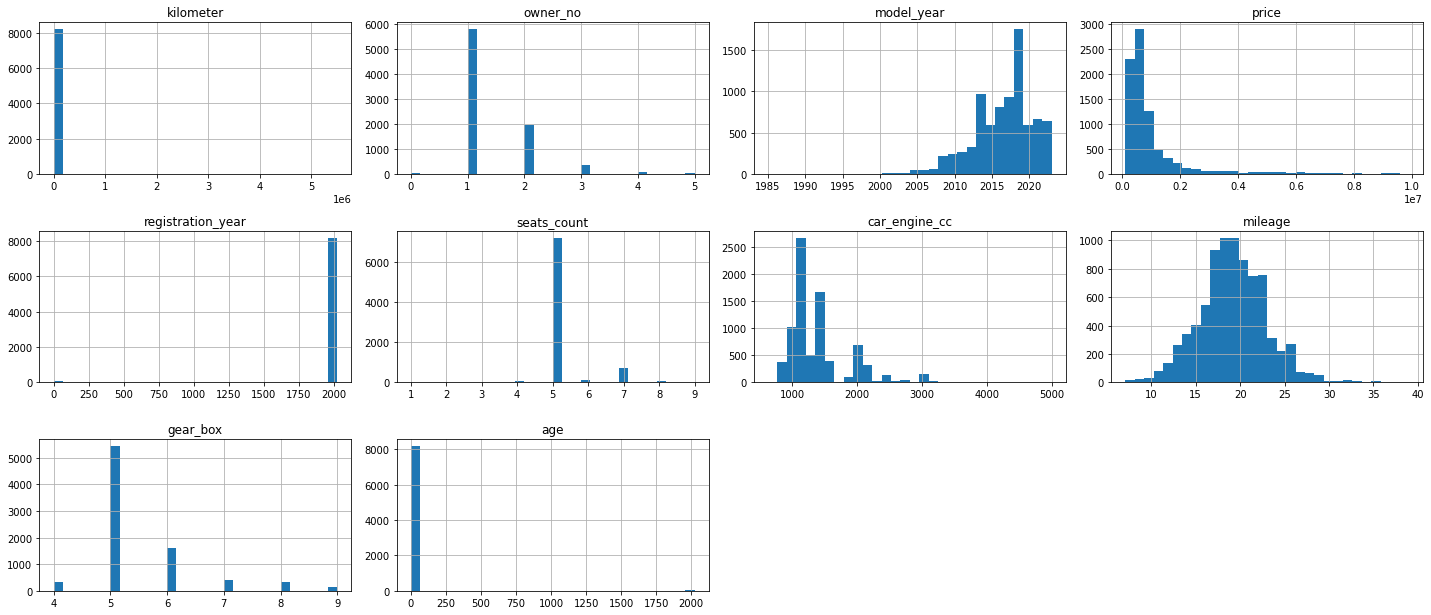

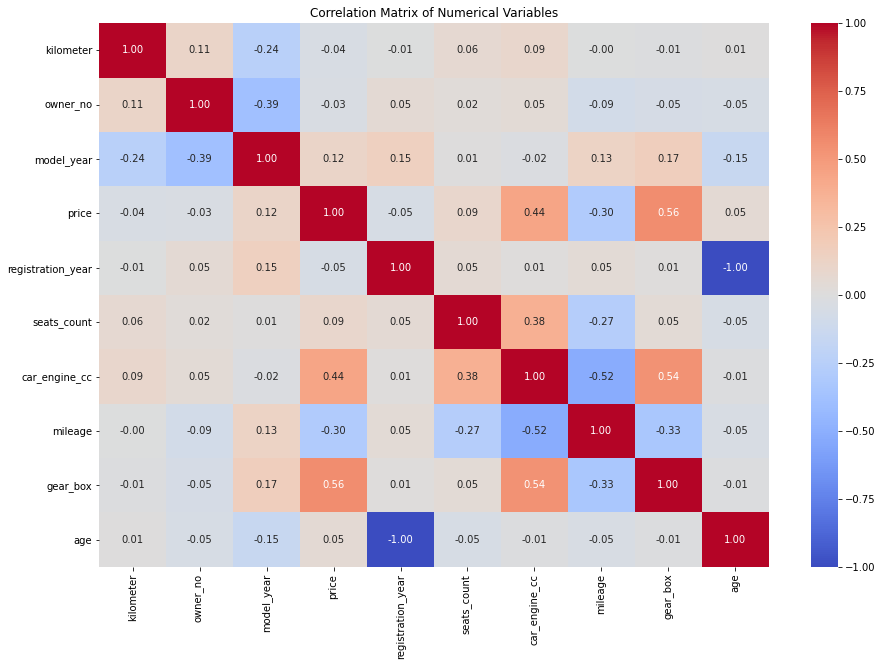

Top features most correlated with Price:
 price                1.000000
gear_box             0.556519
car_engine_cc        0.442362
model_year           0.115790
seats_count          0.089599
age                  0.053960
owner_no            -0.032534
kilometer           -0.043124
registration_year   -0.053960
mileage             -0.295427
Name: price, dtype: float64


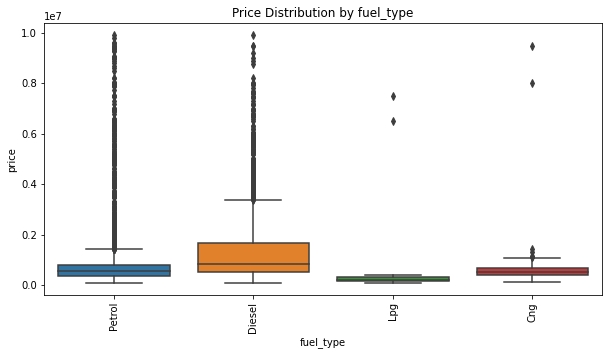

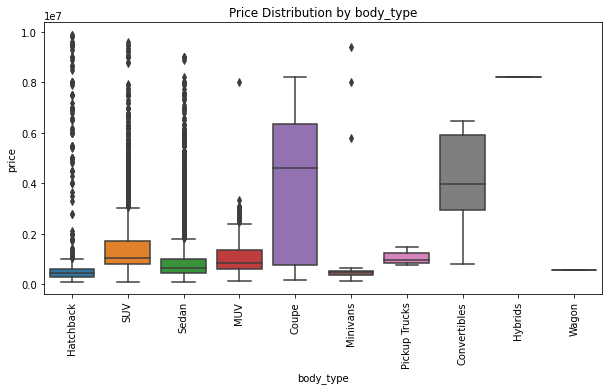

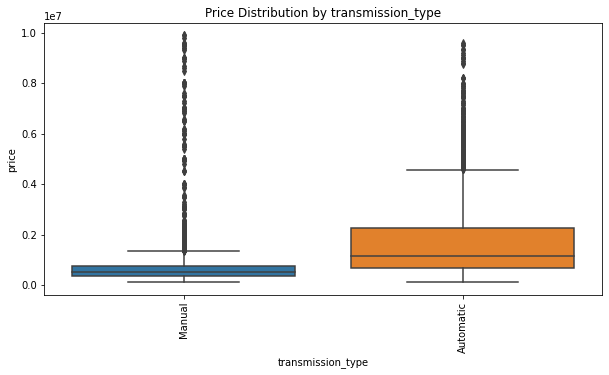

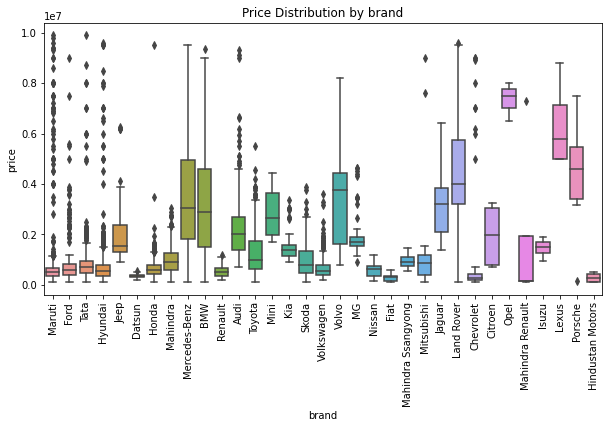

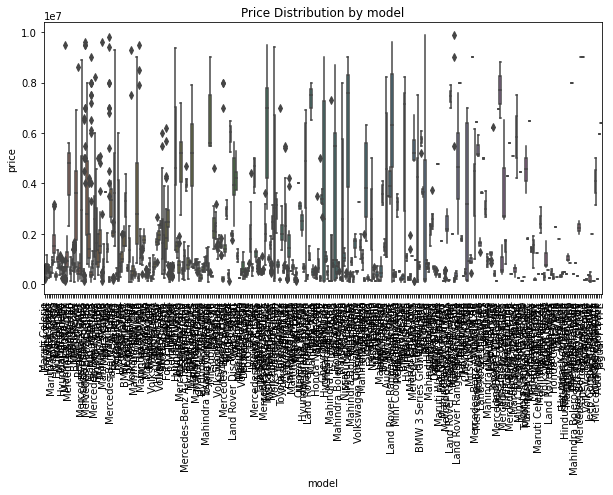

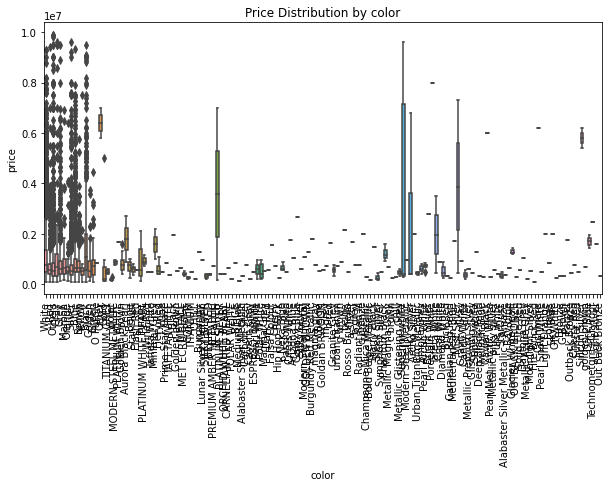

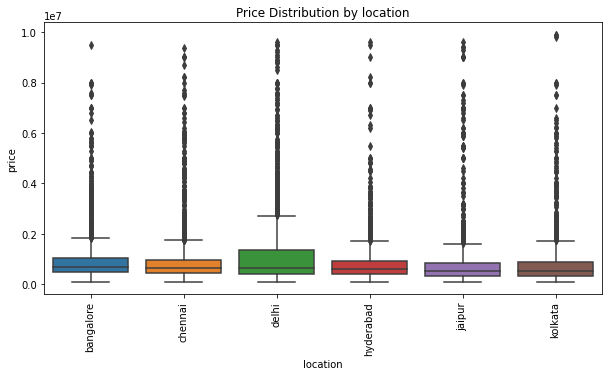

Top important features:
 gear_box             0.313079
model_year           0.167234
car_engine_cc        0.149508
kilometer            0.074515
mileage              0.055610
model                0.045197
location             0.039398
age                  0.029167
registration_year    0.028211
color                0.024628
dtype: float64


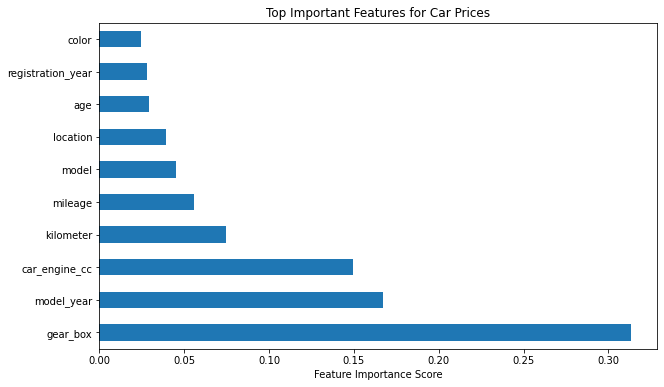

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def identify_important_features(df):
    # Handle categorical data with label encoding for simplicity
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    # Split data into features and target variable
    X = df_encoded.drop('price', axis=1)
    y = df_encoded['price']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)
    print("Top important features:\n", top_features)

    # Plot top important features
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top Important Features for Car Prices')
    plt.xlabel('Feature Importance Score')
    plt.show()
    
# Execute the functions
plot_numerical_distributions(data)
plot_correlation_heatmap(data)
analyze_categorical_variables(data)
identify_important_features(data)


Mean Absolute Error: 252513.33942819148
Mean Squared Error: 585258650155.329
R^2 Score: 0.6179378194381241


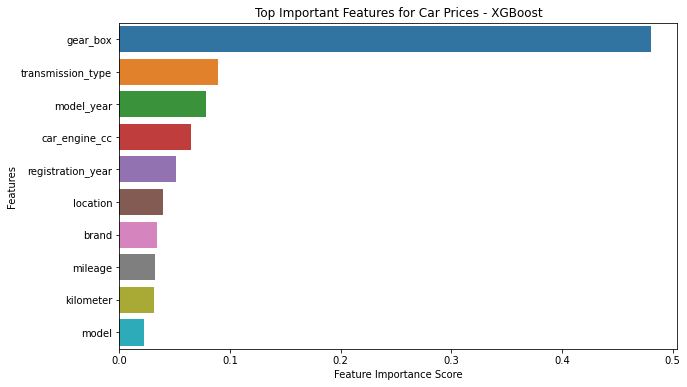

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Handle categorical data with label encoding for simplicity
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split data into features and target variable
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top Important Features for Car Prices - XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

<Figure size 1080x720 with 0 Axes>

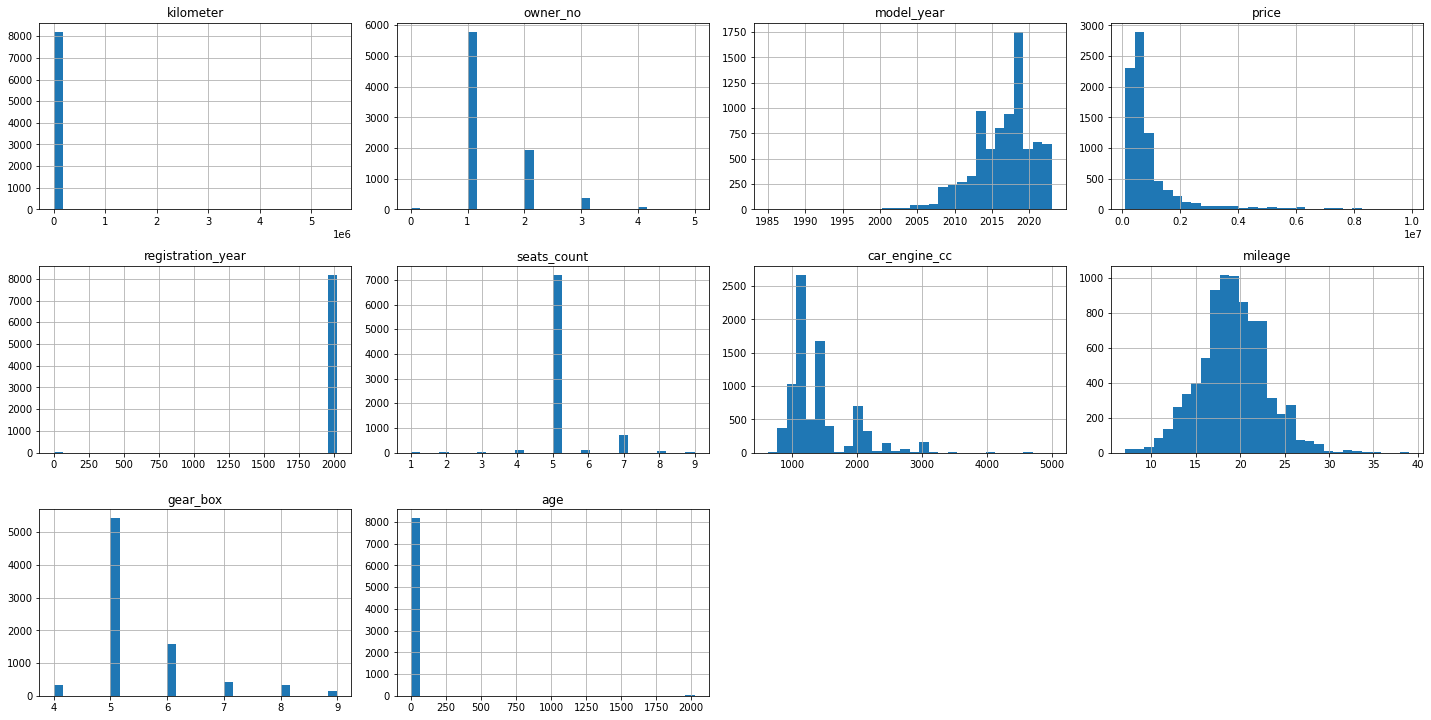

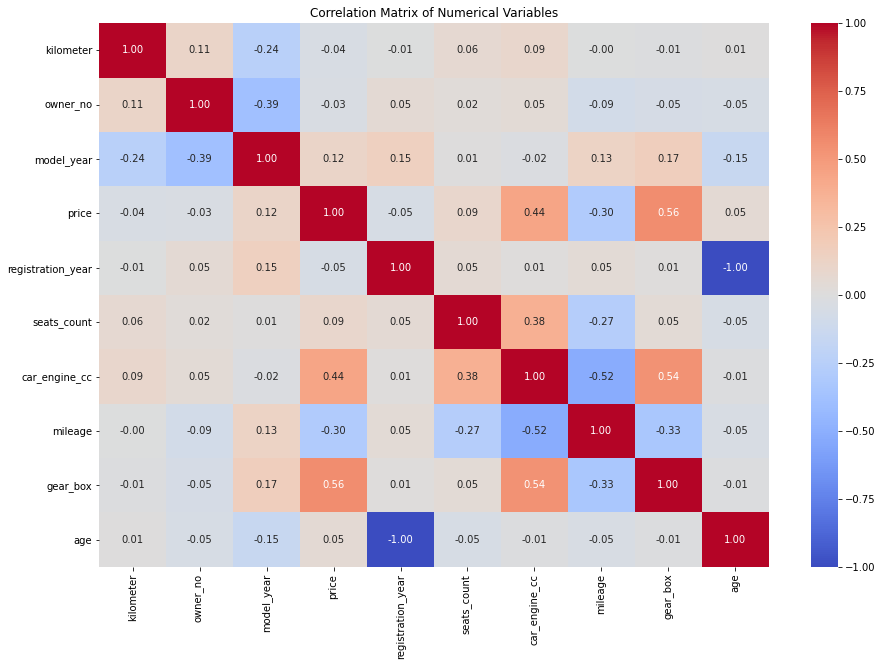

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical variables to visualize their distributions
data.hist(bins=30, figsize=(20, 20), layout=(6, 4))
plt.tight_layout()
plt.show()

# Calculate correlation matrix for numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Most Important Categorical Features based on Mutual Information:
body_type            0.202766
transmission_type    0.154942
fuel_type            0.092061
brand                0.075432
model                0.049894
color                0.047668
location             0.036748
dtype: float64


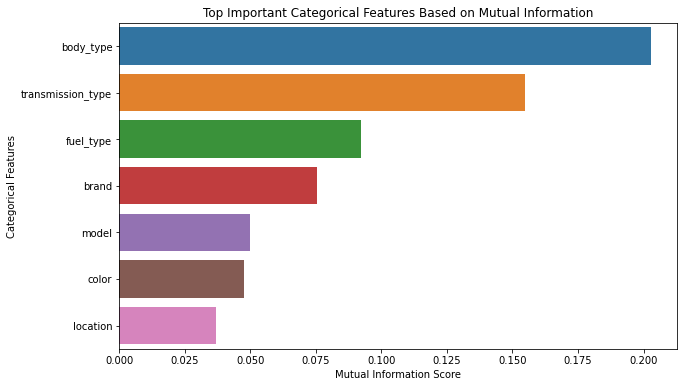

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Step 2: Calculate Mutual Information for categorical features
mi = mutual_info_regression(X[categorical_cols], y, random_state=42)

# Create a DataFrame to display results
mi_scores = pd.Series(mi, index=categorical_cols).sort_values(ascending=False)

# Step 3: Display the most important categorical features
print("Most Important Categorical Features based on Mutual Information:")
print(mi_scores.head(10))

# Plot the top important categorical features
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.head(10), y=mi_scores.head(10).index)
plt.title('Top Important Categorical Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Categorical Features')
plt.show()


Mean Absolute Error: 274062.2962753896
Mean Squared Error: 709444832363.7644
R^2 Score: 0.5368679479247056
Most Important Numerical Features based on RandomForestRegressor:
gear_box             0.325169
car_engine_cc        0.188272
model_year           0.172581
kilometer            0.114305
mileage              0.092095
age                  0.033179
registration_year    0.032914
owner_no             0.026989
seats_count          0.014496
dtype: float64


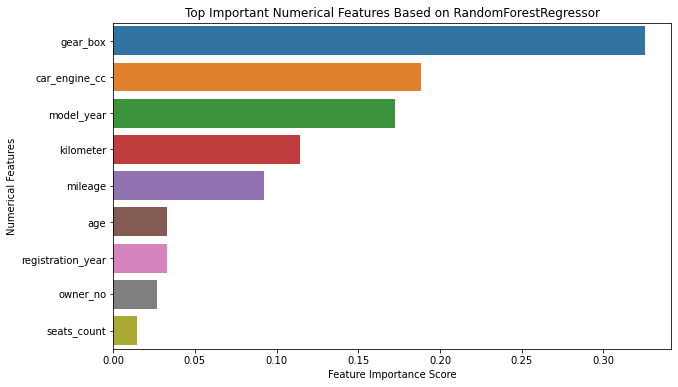

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('price')  # Exclude the target variable 'Price'

# Step 2: Split data into features (X) and target variable (y)
X = data[numerical_cols]
y = data['price']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 6: Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False)

# Step 7: Display the most important numerical features
print("Most Important Numerical Features based on RandomForestRegressor:")
print(top_features.head(10))

# Plot the top important numerical features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(10), y=top_features.head(10).index)
plt.title('Top Important Numerical Features Based on RandomForestRegressor')
plt.xlabel('Feature Importance Score')
plt.ylabel('Numerical Features')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np


# Identify Important Features (Assuming features are identified previously)
# Replace with your identified important features
important_numerical_cols = ['kilometer', 'owner_no', 'model_year', 'registration_year','seats_count', 'car_engine_cc', 'mileage', 'gear_box', 'age'] # Example
important_categorical_cols = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model','color', 'location']

# Step 1: Encoding Categorical Variables
# Identify nominal and ordinal categorical variables
nominal_cats = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model','color', 'location']# Assuming these are nominal
ordinal_cats = ['gear_box']    # Assuming 'Transmission' is ordinal, adjust based on data understanding


# Encoding Nominal Categorical Variables using One-Hot Encoding
# Encoding Ordinal Categorical Variables using Label Encoding
label_encoders = {col: LabelEncoder() for col in ordinal_cats}
for col in ordinal_cats:
    data[col] = label_encoders[col].fit_transform(data[col])

# One-Hot Encoding for Nominal Variables
data = pd.get_dummies(data, columns=nominal_cats, drop_first=True)

# Normalizing Numerical Data



In [23]:
scaler = MinMaxScaler()
data[important_numerical_cols] = scaler.fit_transform(data[important_numerical_cols])

In [24]:
scaler = StandardScaler()
data[important_numerical_cols] = scaler.fit_transform(data[important_numerical_cols])


In [25]:
X = data[important_numerical_cols + list(data.columns.difference(important_numerical_cols + ['price']))]
y = data['price']
print(X.dtypes)


kilometer              float64
owner_no               float64
model_year             float64
registration_year      float64
seats_count            float64
                        ...   
model_96                  bool
model_97                  bool
model_98                  bool
model_99                  bool
transmission_type_1       bool
Length: 515, dtype: object


In [26]:
# Step 3: Train-Test Split
X = data[important_numerical_cols + list(data.columns.difference(important_numerical_cols + ['price']))]
y = data['price']

# Convert non-numerical columns to numerical using one-hot encoding
X = pd.get_dummies(X)  # Convert categorical features to numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Model Selection - Choose models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Step 5: Model Training and Evaluation using Cross-Validation
results = {}
for name, model in models.items():
    # Train the model using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = np.mean(cv_scores)
    print(f"{name}: Mean CV MAE = {-np.mean(cv_scores):.4f}")

# Select the best performing model based on cross-validation
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

Linear Regression: Mean CV MAE = 7688802829833218.0000
Decision Tree: Mean CV MAE = 291338.6020
Random Forest: Mean CV MAE = 244450.0756
Gradient Boosting: Mean CV MAE = 317613.5991

Best Model: Linear Regression
Test MAE: 500757311457268.3750
Test MSE: 20681026844995421212931365273600.0000
Test R^2: -13500762800448286720.0000


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data=pd.read_csv("cardekho.csv")

important_numerical_cols =['kilometer', 'owner_no', 'model_year', 'registration_year','seats_count', 'car_engine_cc', 'mileage', 'gear_box', 'age'] 
important_categorical_cols = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model','color', 'location']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# # Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
print("Model trained and ready for predictions.")

# Evaluate on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

Model trained and ready for predictions.
Test MAE: 231292.2642
Test MSE: 634923406970.5110
Test R^2: 0.5911


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the Excel file
df=pd.read_csv("cardekho.csv")

# Step 1: Calculate Age of the Car
current_year = datetime.now().year
#df['Car_Age'] = current_year - df['model_year']  # Assuming the column is named 'Year_of_Manufacture'

# Step 2: Calculate Mileage per Year
df['mileage_per_Year'] = df['mileage'] / df['age']  # Assuming the column is named 'Mileage'

# Display the updated dataset with new features
print(df.head())


  fuel_type  body_type  kilometer transmission_type  owner_no    brand  \
0    Petrol  Hatchback     120000            Manual         3   Maruti   
1    Petrol        SUV      32706            Manual         2     Ford   
2    Petrol  Hatchback      11949            Manual         1     Tata   
3    Petrol      Sedan      17794            Manual         1  Hyundai   
4    Diesel        SUV      60000            Manual         1   Maruti   

                model  model_year     price  registration_year  seats_count  \
0      Maruti Celerio        2015  400000.0               2015            5   
1       Ford Ecosport        2018  811000.0               2018            5   
2          Tata Tiago        2018  585000.0               2018            5   
3       Hyundai Xcent        2014  462000.0               2014            5   
4  Maruti SX4 S Cross        2015  790000.0               2015            5   

  RDO_no  car_engine_cc  mileage   color  gear_box   location  age  \
0   KA51  

In [29]:
df.to_excel('FeaturesEngineered.xlsx', index=False)
     

In [30]:
import numpy as np

# Check for NaN values
nan_rows = X_numerical[np.isnan(X_numerical).any(axis=1)]
print("Rows with NaN values:\n", nan_rows)

# Check for Infinite values
inf_rows = X_numerical[np.isinf(X_numerical).any(axis=1)]
print("Rows with infinite values:\n", inf_rows)


Rows with NaN values:
 Empty DataFrame
Columns: [kilometer, owner_no, model_year, registration_year, seats_count, car_engine_cc, mileage, gear_box, age]
Index: []
Rows with infinite values:
 Empty DataFrame
Columns: [kilometer, owner_no, model_year, registration_year, seats_count, car_engine_cc, mileage, gear_box, age]
Index: []


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = pd.read_excel('FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['kilometer', 'owner_no', 'model_year', 'registration_year',
                            'seats_count', 'car_engine_cc', 'mileage', 'gear_box', 'age', 'mileage_per_Year']
important_categorical_cols = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model', 'color', 'location']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# 1. Clean both numerical and categorical data by replacing or removing NaN/inf values
X_cleaned = X.replace([np.inf, -np.inf], np.nan).dropna()  # Drop any rows with NaN or inf values

# Now separate the cleaned data again
X_numerical_cleaned = X_cleaned[important_numerical_cols]
X_categorical_cleaned = X_cleaned[important_categorical_cols]

# 2. Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical_cleaned)

# 3. Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical_cleaned).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Ensure `y` also matches the cleaned X
y_cleaned = y.loc[X_cleaned.index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_cleaned, test_size=0.3, random_state=0)

# Train Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test)

# Train Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Lasso evaluation
lasso_mae, lasso_mse, lasso_r2 = evaluate_model(y_test, y_pred_lasso)
print(f"Lasso: MAE={lasso_mae}, MSE={lasso_mse}, R2={lasso_r2}")

# Ridge evaluation
ridge_mae, ridge_mse, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge: MAE={ridge_mae}, MSE={ridge_mse}, R2={ridge_r2}")


Lasso: MAE=347817.64666440093, MSE=871252924979.5842, R2=0.39354565157324173
Ridge: MAE=350396.34346522496, MSE=758975221561.109, R2=0.47169896333526506


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542357328791533.2, tolerance: 906450958675.2825
  model = cd_fast.enet_coordinate_descent(


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_excel('FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['kilometer', 'owner_no', 'model_year', 'registration_year',
                            'seats_count', 'car_engine_cc', 'mileage', 'gear_box', 'age', 'mileage_per_Year']
important_categorical_cols = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model', 'color', 'location']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols].copy()
X_categorical = X[important_categorical_cols]

# Handle infinite values and NaN values
X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numerical.fillna(X_numerical.mean(), inplace=True)

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# Initialize models with increased iterations for Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
ridge = Ridge(alpha=1.0)

# Train models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Calculate metrics for Lasso
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Calculate metrics for Ridge
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print results
print("Lasso Regression:")
print(f"Training MAE: {mae_train_lasso:.4f}, Test MAE: {mae_test_lasso:.4f}")
print(f"Training MSE: {mse_train_lasso:.4f}, Test MSE: {mse_test_lasso:.4f}")
print(f"Training R²: {r2_train_lasso:.4f}, Test R²: {r2_test_lasso:.4f}")

print("\nRidge Regression:")
print(f"Training MAE: {mae_train_ridge:.4f}, Test MAE: {mae_test_ridge:.4f}")
print(f"Training MSE: {mse_train_ridge:.4f}, Test MSE: {mse_test_ridge:.4f}")
print(f"Training R²: {r2_train_ridge:.4f}, Test R²: {r2_test_ridge:.4f}")


Lasso Regression:
Training MAE: 283493.7864, Test MAE: 325795.2800
Training MSE: 536098120392.2963, Test MSE: 828983521648.4923
Training R²: 0.6663, Test R²: 0.4661

Ridge Regression:
Training MAE: 303701.7112, Test MAE: 328266.4662
Training MSE: 562578807749.8965, Test MSE: 772637122565.6124
Training R²: 0.6498, Test R²: 0.5024


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695568942023856.0, tolerance: 937516724434.5442
  model = cd_fast.enet_coordinate_descent(


In [33]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [34]:
summary_stats = data.describe()
print(summary_stats)


           kilometer     owner_no   model_year         price  \
count    4667.000000  4667.000000  4667.000000  4.667000e+03   
mean    57543.365760     1.343047  2016.170345  5.482931e+05   
std     31397.868252     0.559335     3.493782  6.684408e+05   
min         0.000000     1.000000  2007.000000  1.000000e+05   
25%     33431.000000     1.000000  2014.000000  3.300000e+05   
50%     54708.000000     1.000000  2017.000000  4.760000e+05   
75%     77951.000000     2.000000  2019.000000  6.350000e+05   
max    153007.000000     3.000000  2023.000000  9.900000e+06   

       registration_year  seats_count  car_engine_cc      mileage  gear_box  \
count        4667.000000       4667.0    4667.000000  4667.000000    4667.0   
mean         2016.243411          5.0    1195.704093    20.495612       5.0   
std             3.508226          0.0     193.280114     2.743732       0.0   
min          2007.000000          5.0     793.000000    11.880000       5.0   
25%          2014.000000    

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pickle

# Load the data (replace with your actual path)
data = pd.read_excel('FeaturesEngineered.xlsx')

# Define important numerical and categorical columns
important_numerical_cols = ['kilometer', 'owner_no', 'model_year', 'registration_year',
                            'seats_count', 'car_engine_cc', 'mileage', 'gear_box', 'age', 'mileage_per_Year']
important_categorical_cols = ['fuel_type', 'body_type', 'transmission_type', 'brand', 'model', 'color', 'location']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols].copy()  # Explicitly make a copy to avoid SettingWithCopyWarning
X_categorical = X[important_categorical_cols]

# Check for NaN or infinite values in numerical data
print("Checking for missing values in numerical data...")
print(X_numerical.isnull().sum())  # Check for missing values
print(np.isinf(X_numerical).sum())  # Check for infinite values

# Replace NaN values with the median or a sensible default
X_numerical.fillna(X_numerical.median(), inplace=True)

# Replace infinite values (if any) with a large finite number
X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numerical.fillna(X_numerical.median(), inplace=True)

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

# Save the trained model, scaler, and encoder using pickle
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

print("Model, scaler, and encoder saved successfully.")


Checking for missing values in numerical data...
kilometer            0
owner_no             0
model_year           0
registration_year    0
seats_count          0
car_engine_cc        0
mileage              0
gear_box             0
age                  0
mileage_per_Year     0
dtype: int64
kilometer              0
owner_no               0
model_year             0
registration_year      0
seats_count            0
car_engine_cc          0
mileage                0
gear_box               0
age                    0
mileage_per_Year     110
dtype: int64
Test MAE: 227239.0329
Test MSE: 611799972437.9834
Test R^2: 0.6060
Model, scaler, and encoder saved successfully.
